# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bonthe
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | polyarnyy
Processing Record 5 of Set 1 | sol'-iletsk
Processing Record 6 of Set 1 | tarawa
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | lucas
Processing Record 9 of Set 1 | jalqani
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | ingeniero guillermo n. juarez
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | katabu
Processing Record 18 of Set 1 | fort bragg
Processing Record 19 of Set 1 | whangarei
Processing Record 20 of Set 1 | claveria
Processing Record 21 of Set 1 | posto fiscal rolim de moura


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bonthe,7.5264,-12.5050,26.24,85,21,2.16,SL,1699863342
1,port-aux-francais,-49.3500,70.2167,4.84,96,100,5.23,TF,1699863343
2,arraial do cabo,-22.9661,-42.0278,23.49,90,47,0.72,BR,1699863158
3,polyarnyy,69.1989,33.4478,-8.34,97,99,3.78,RU,1699863343
4,sol'-iletsk,51.1631,54.9918,6.71,60,100,7.55,RU,1699863343


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bonthe,7.5264,-12.5050,26.24,85,21,2.16,SL,1699863342
1,port-aux-francais,-49.3500,70.2167,4.84,96,100,5.23,TF,1699863343
2,arraial do cabo,-22.9661,-42.0278,23.49,90,47,0.72,BR,1699863158
3,polyarnyy,69.1989,33.4478,-8.34,97,99,3.78,RU,1699863343
4,sol'-iletsk,51.1631,54.9918,6.71,60,100,7.55,RU,1699863343


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

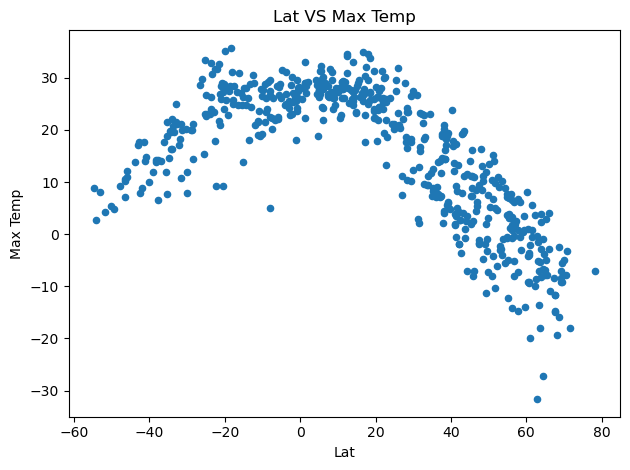

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat',y='Max Temp',marker='o', linestyle='-')

# Incorporate the other graph properties
plt.title("Lat VS Max Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")
plt.tight_layout()

# Show plot
plt.show()

#### Latitude Vs. Humidity

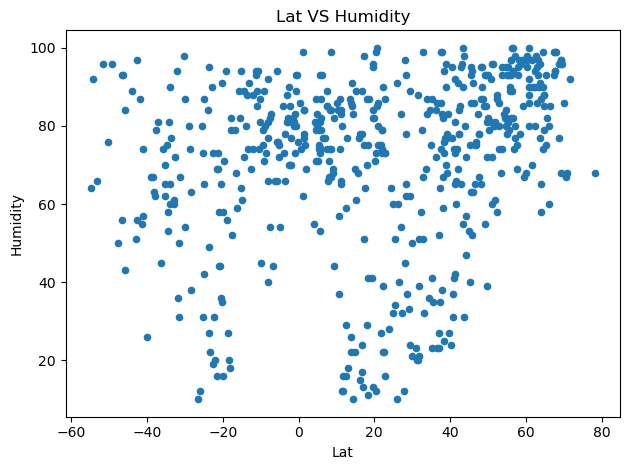

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat',y='Humidity',marker='o', linestyle='-')

# Incorporate the other graph properties
plt.title("Lat VS Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")
plt.tight_layout()

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

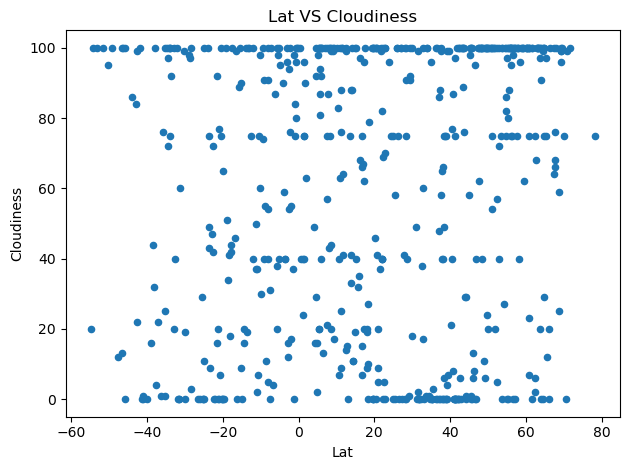

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat',y='Cloudiness',marker='o', linestyle='-')

# Incorporate the other graph properties
plt.title("Lat VS Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

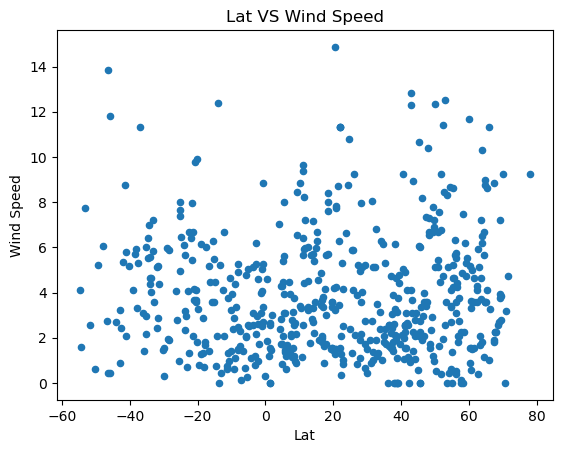

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat',y='Wind Speed',marker='o', linestyle='-')

# Incorporate the other graph properties
plt.title("Lat VS Wind Speed")

# Save the 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
## Created function to create linear regressions for data frame,x,y
## Function takes: ( Dataframe,x-axis,y-axis,chart title(optional) )
def autoregress(data,x,y,z=""):

    df = data
    x_data = df[x]
    y_data = df[y]
    if z == "":
        z = f"{x} VS {y}"
    else: z == z 

    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_data, y_data)
    regress_values = x_data * slope + intercept

    df.plot.scatter(x=x,y=y,marker='o', linestyle='-')
    plt.plot(x_data,regress_values,"r-")

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    correlation = stats.pearsonr(x_data,y_data)

    plt.title(f"{z}")
    plt.savefig(f"output_data/FigLinear({y}).png")
    plt.tight_layout()
    plt.annotate(line_eq,(max(x_data - 86),max(y_data)-1),fontsize=12,color="red",bbox=dict(boxstyle='round', fc='white', alpha=.8))

    print(f"The r-value is: {round(correlation[0],2)}")

    plt.show()

#### Latitude Vs. Temperature (Linear Regression)

The r-value is: -0.64


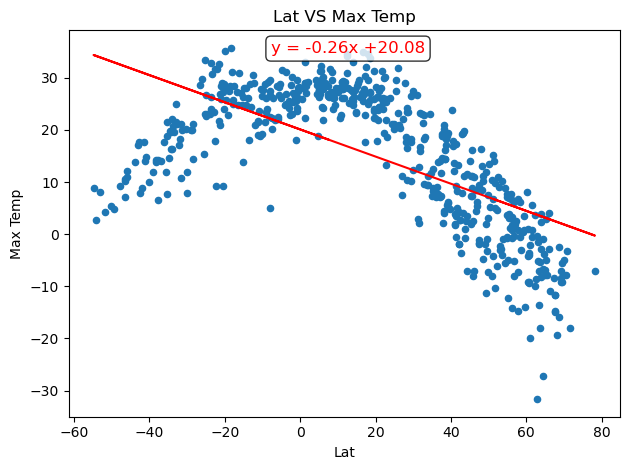

In [13]:
autoregress(city_data_df,"Lat","Max Temp")

#### Latitude Vs. Humidity(Linear Regression)

The r-value is: 0.22


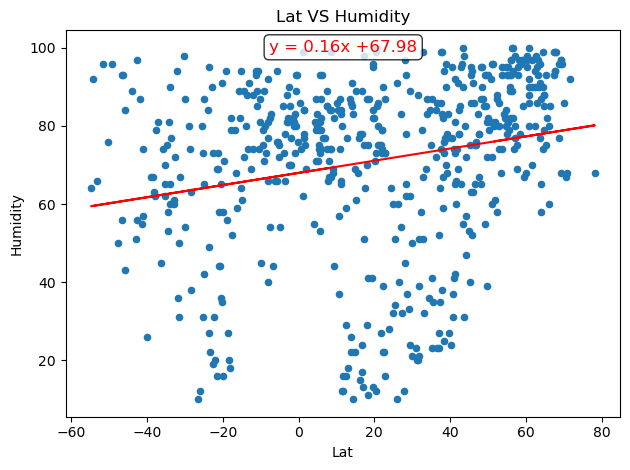

In [14]:
autoregress(city_data_df,"Lat","Humidity")

The r-value is: 0.13


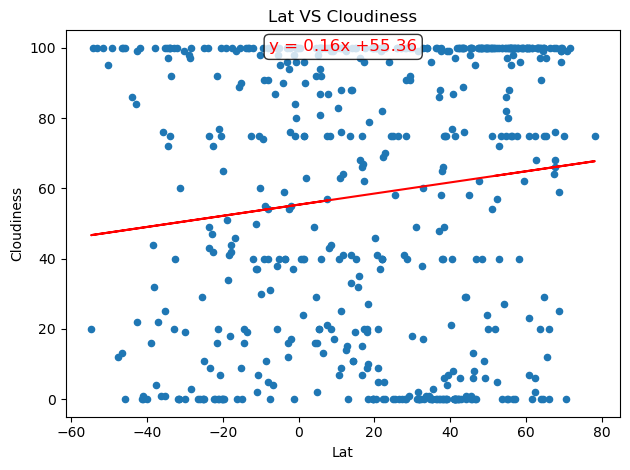

In [15]:
autoregress(city_data_df,"Lat","Cloudiness")

#### Latitude vs. Wind Speed Plot(Linear Regression)

The r-value is: 0.01


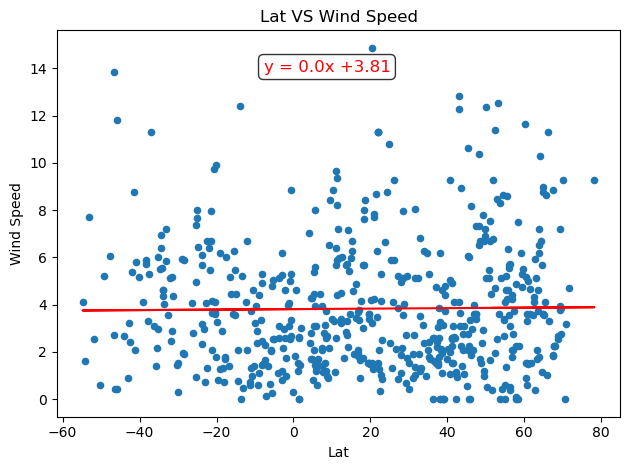

In [16]:
autoregress(city_data_df,"Lat","Wind Speed")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bonthe,7.5264,-12.5050,26.24,85,21,2.16,SL,1699863342
3,polyarnyy,69.1989,33.4478,-8.34,97,99,3.78,RU,1699863343
4,sol'-iletsk,51.1631,54.9918,6.71,60,100,7.55,RU,1699863343
5,tarawa,1.4190,172.9840,29.05,84,75,0.00,KI,1699863344
6,albany,42.6001,-73.9662,-3.66,85,6,0.94,US,1699863123


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.84,96,100,5.23,TF,1699863343
2,arraial do cabo,-22.9661,-42.0278,23.49,90,47,0.72,BR,1699863158
9,edinburgh of the seven seas,-37.0676,-12.3116,14.03,81,22,11.31,SH,1699863345
11,ingeniero guillermo n. juarez,-23.9000,-61.8500,23.12,84,100,6.11,AR,1699863346
13,port mathurin,-19.6833,63.4167,25.77,71,0,0.80,MU,1699863347


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.89


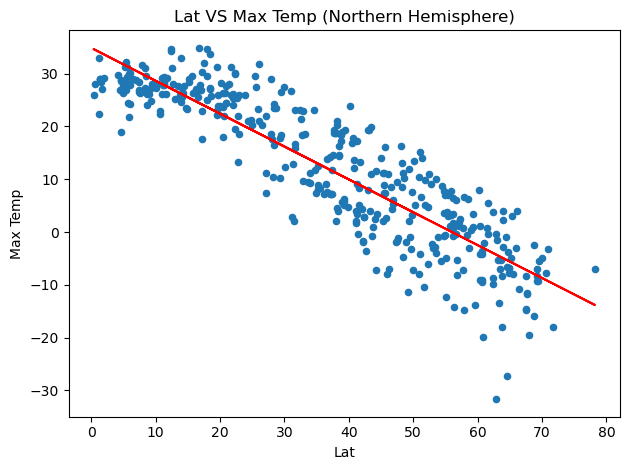

In [19]:
# Linear regression on Northern Hemisphere
autoregress(northern_hemi_df,"Lat","Max Temp","Lat VS Max Temp (Northern Hemisphere)")

The r-value is: 0.69


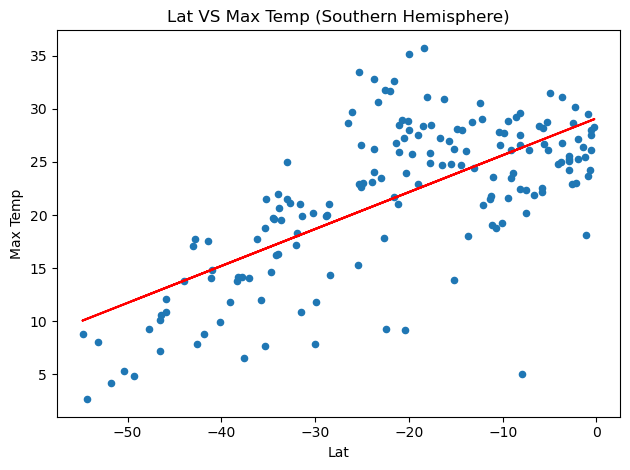

In [20]:
# Linear regression on Southern Hemisphere
autoregress(southern_hemi_df,"Lat","Max Temp","Lat VS Max Temp (Southern Hemisphere)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.32


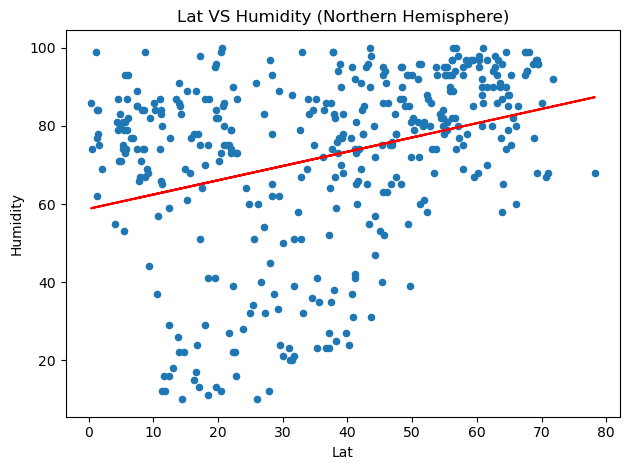

In [21]:
# Northern Hemisphere
autoregress(northern_hemi_df,"Lat","Humidity","Lat VS Humidity (Northern Hemisphere)")

The r-value is: 0.16


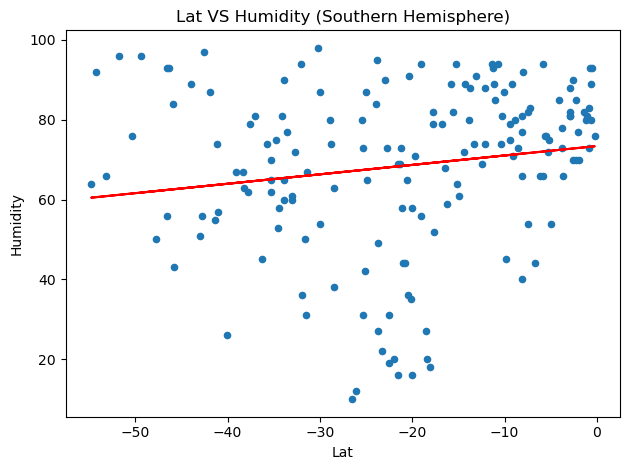

In [22]:
# Southern Hemisphere
autoregress(southern_hemi_df,"Lat","Humidity","Lat VS Humidity (Southern Hemisphere)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12


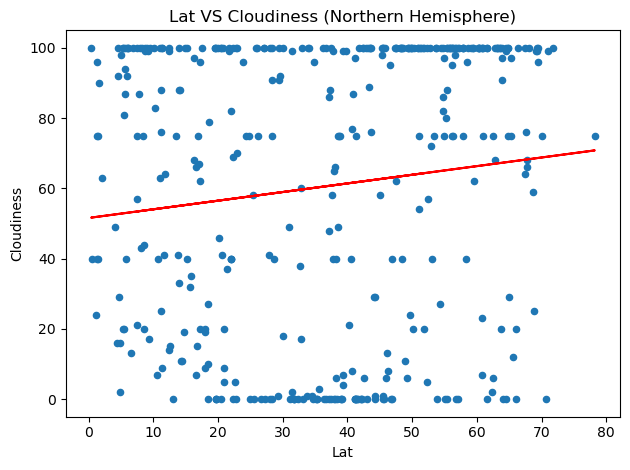

In [23]:
# Northern Hemisphere
autoregress(northern_hemi_df,"Lat","Cloudiness","Lat VS Cloudiness (Northern Hemisphere)")

The r-value is: 0.05


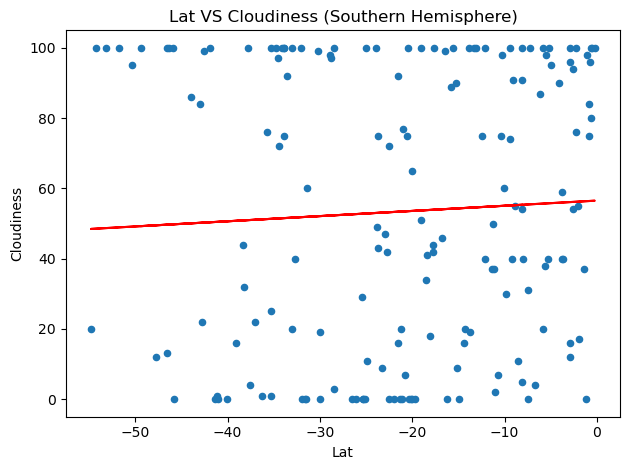

In [24]:
# Southern Hemisphere
autoregress(southern_hemi_df,"Lat","Cloudiness","Lat VS Cloudiness (Southern Hemisphere)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08


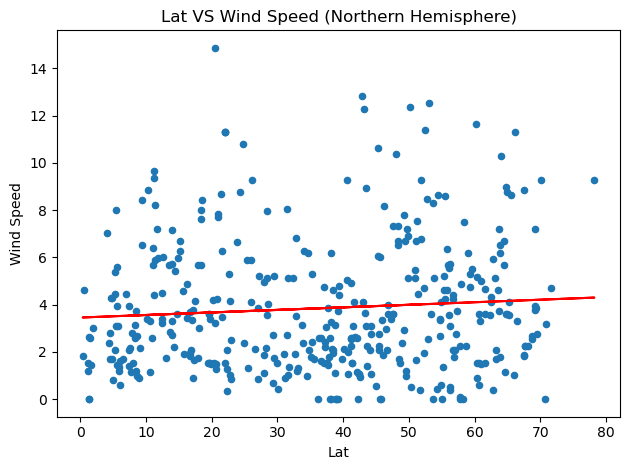

In [25]:
# Northern Hemisphere
autoregress(northern_hemi_df,"Lat","Wind Speed","Lat VS Wind Speed (Northern Hemisphere)")

The r-value is: -0.24


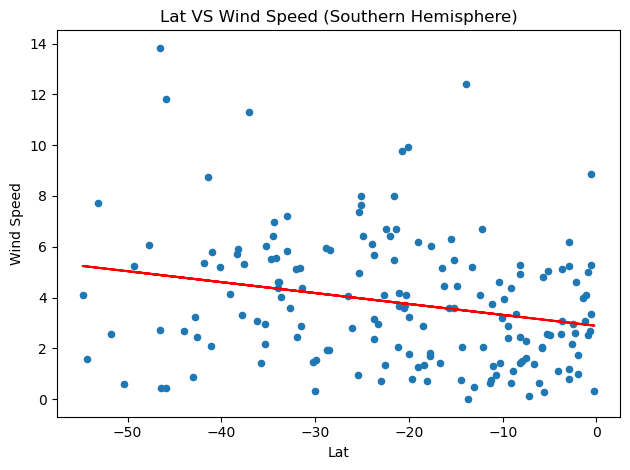

In [26]:
# Southern Hemisphere
autoregress(southern_hemi_df,"Lat","Wind Speed","Lat VS Wind Speed (Southern Hemisphere)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE